In [1]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 59 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (123 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144328 files and directories currently installed.)
Pre

In [ ]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702117 sha256=bcd5c891b0441974d270e7db4796cb262fdc5abcc8a52e0e200262bdd14077f8
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.1.post1
    Uninstalling pyproj-2.6.1.post1:
      Successfully uninstalled pyproj-2.6.1.post1


In [2]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from itertools import chain
 
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
 
    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.5, color='w')

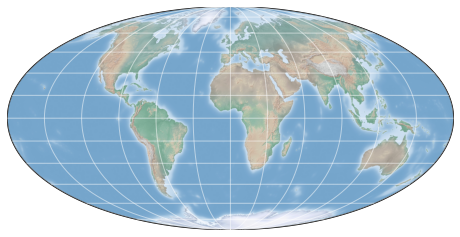

In [12]:
fig = plt.figure(figsize=(8, 8), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


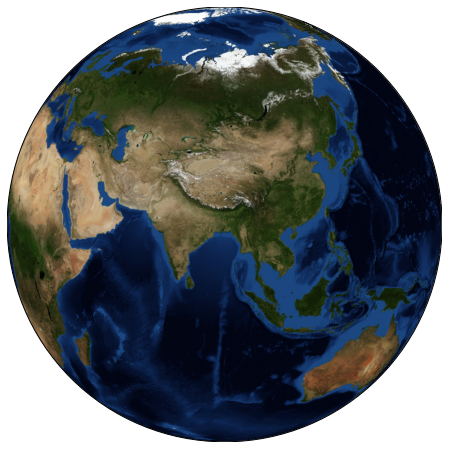

In [14]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=23.45, lon_0=90)
m.bluemarble(scale=0.5);
m.drawcounties()

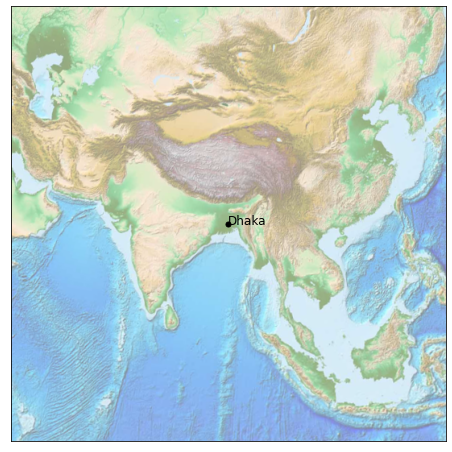

In [15]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=23.45, lon_0=90,)
m.etopo(scale=0.5, alpha=0.5)
# Map (long, lat) to (x, y) for plotting
x, y = m(90, 23.45)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'Dhaka', fontsize=12);
 
#m.drawcounties()

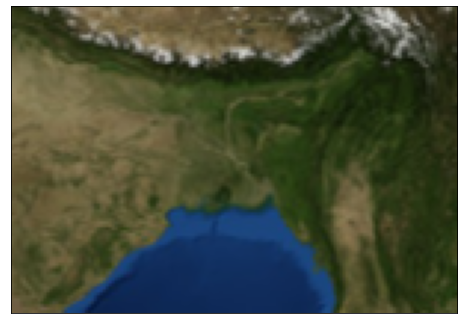

In [ ]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='mill', resolution="f", llcrnrlat=17,urcrnrlat=30,llcrnrlon=80,urcrnrlon=100)
m.bluemarble(scale=0.5);
 
m.drawcounties()
 
plt.show()

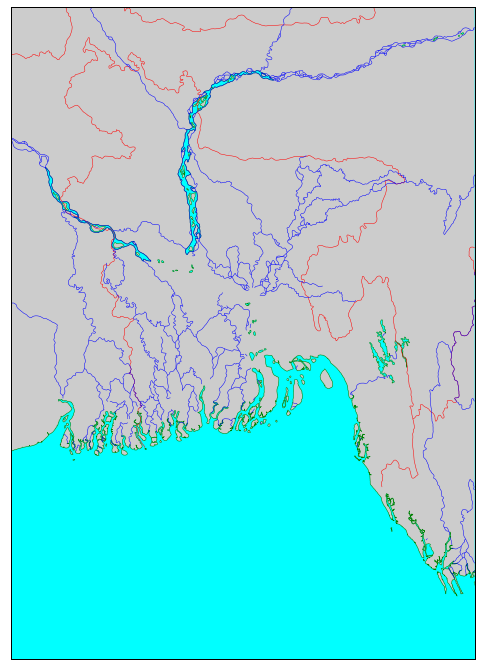

In [16]:
plt.figure(figsize=(12, 12))
m = Basemap(projection='mill', resolution="f", llcrnrlat=19,urcrnrlat=27,llcrnrlon=87.4,urcrnrlon=93.4)
m.drawcoastlines(color='green',linewidth=.5)
m.drawcountries(color='red')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color=".8")
m.drawrivers(color='blue')
#m.drawlsmask(land_color='0.8',ocean_color='aqua',lakes=True) #same togerther fillcour and fillcontinents
 
plt.show()

Golabl map

In [17]:
!pip install pycountry

     |████████████████████████████████| 10.0MB 4.5MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=c592be7a492680d5f320c06f3d0450c6fbe58f950a4daf75431f2f4c847714a5
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry


In [18]:
import pycountry
import plotly.express as px
import pandas as pd
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df1 = pd.read_csv(URL_DATASET)
print(df1.head(3))  # Get first 3 entries in the dataframe
print(df1.tail(3))  # Get last 3 entries in the dataframe


         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-22      Albania          0          0       0
2  2020-01-22      Algeria          0          0       0
             Date   Country  Confirmed  Recovered  Deaths
28385  2020-06-20     Yemen        922        328     254
28386  2020-06-20    Zambia       1430       1194      11
28387  2020-06-20  Zimbabwe        479         63       4


In [19]:
#px.choropleth(data_frame=None, lat=None, lon=None, locations=None, locationmode=None,  color=None, hover_name=None, hover_data=None, custom_data=None, animation_frame=None, animation_group=None, category_orders={}, labels={}, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, projection=None, scope=None, center=None, title=None, template=None, width=None, height=None)


In [ ]:
# Together full code

import pycountry
import plotly.express as px
import pandas as pd
 
 
# ----------- Step 1 ------------
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df1 = pd.read_csv(URL_DATASET)
# print(df1.head) # Uncomment to see what the dataframe is like
print(df1.head(3))  # Get first 3 entries in the dataframe
print(df1.tail(3))  # Get last 3 entries in the dataframe
# ----------- Step 2 ------------
list_countries = df1['Country'].unique().tolist()
#list_countries= np.reshape(list_countries,(len(list_countries),1))
print(list_countries) # Uncomment to see list of countries
d_country_code = {}  # To hold the country names and their ISO
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        # country_data is a list of objects of class pycountry.db.Country
        # The first item  ie at index 0 of list is best fit
        # object of class Country have an alpha_3 attribute
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        d_country_code.update({country: ' '})
 
# print(d_country_code) # Uncomment to check dictionary  
 
# create a new column iso_alpha in the df
# and fill it with appropriate iso 3 code
for k, v in d_country_code.items():
    df1.loc[(df1.Country == k), 'iso_alpha'] = v
 
# print(df1.head)  # Uncomment to confirm that ISO codes added
# ----------- Step 3 ------------
fig = px.choropleth(data_frame = df1,
                    locations= "iso_alpha",
                    color= "Confirmed",  # value in column 'Confirmed' determines color
                    hover_name= "Country",
                    color_continuous_scale= 'portland',  #  color scale red, yellow green
                    animation_frame= "Date")
 
fig.show()

         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-22      Albania          0          0       0
2  2020-01-22      Algeria          0          0       0
             Date   Country  Confirmed  Recovered  Deaths
28385  2020-06-20     Yemen        922        328     254
28386  2020-06-20    Zambia       1430       1194      11
28387  2020-06-20  Zimbabwe        479         63       4
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica'